## Import the libraries

In [1]:
import matplotlib.pyplot as plt
import json
from pennylane import numpy as np

from utils import read_configurations
from Data_load import data_load


2024-05-09 09:06:59.787587: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-09 09:06:59.847972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 09:07:00.885965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Loaded filtered images 

In [2]:


data = data_load()
train_images, train_labels, test_images, test_labels = data.data_mnist()


config = read_configurations('./config.json')
SAVE_PATH = config['SAVE_PATH'] 
n_channels = config['CHANNELS'] # Number of channels


#filtered_train_images = np.load(SAVE_PATH + "filtered_train_images_geometrical.npy")
filtered_classical_w_pooling = np.load(SAVE_PATH + "filtered_train_images_classical_w_pooling.npy")
filtered_classical_wo_pooling = np.load(SAVE_PATH + "filtered_train_images_classical_wo_pooling.npy")

filtered_train_images_quantum_random = np.load(SAVE_PATH + "filtered_train_images_quantum_random.npy")
filtered_train_images_quantum_cnot = np.load(SAVE_PATH + "filtered_train_images_quantum_cnot.npy")

filtered_train_images_geometrical = np.load(SAVE_PATH + "filtered_train_images_geometrical.npy")

60000


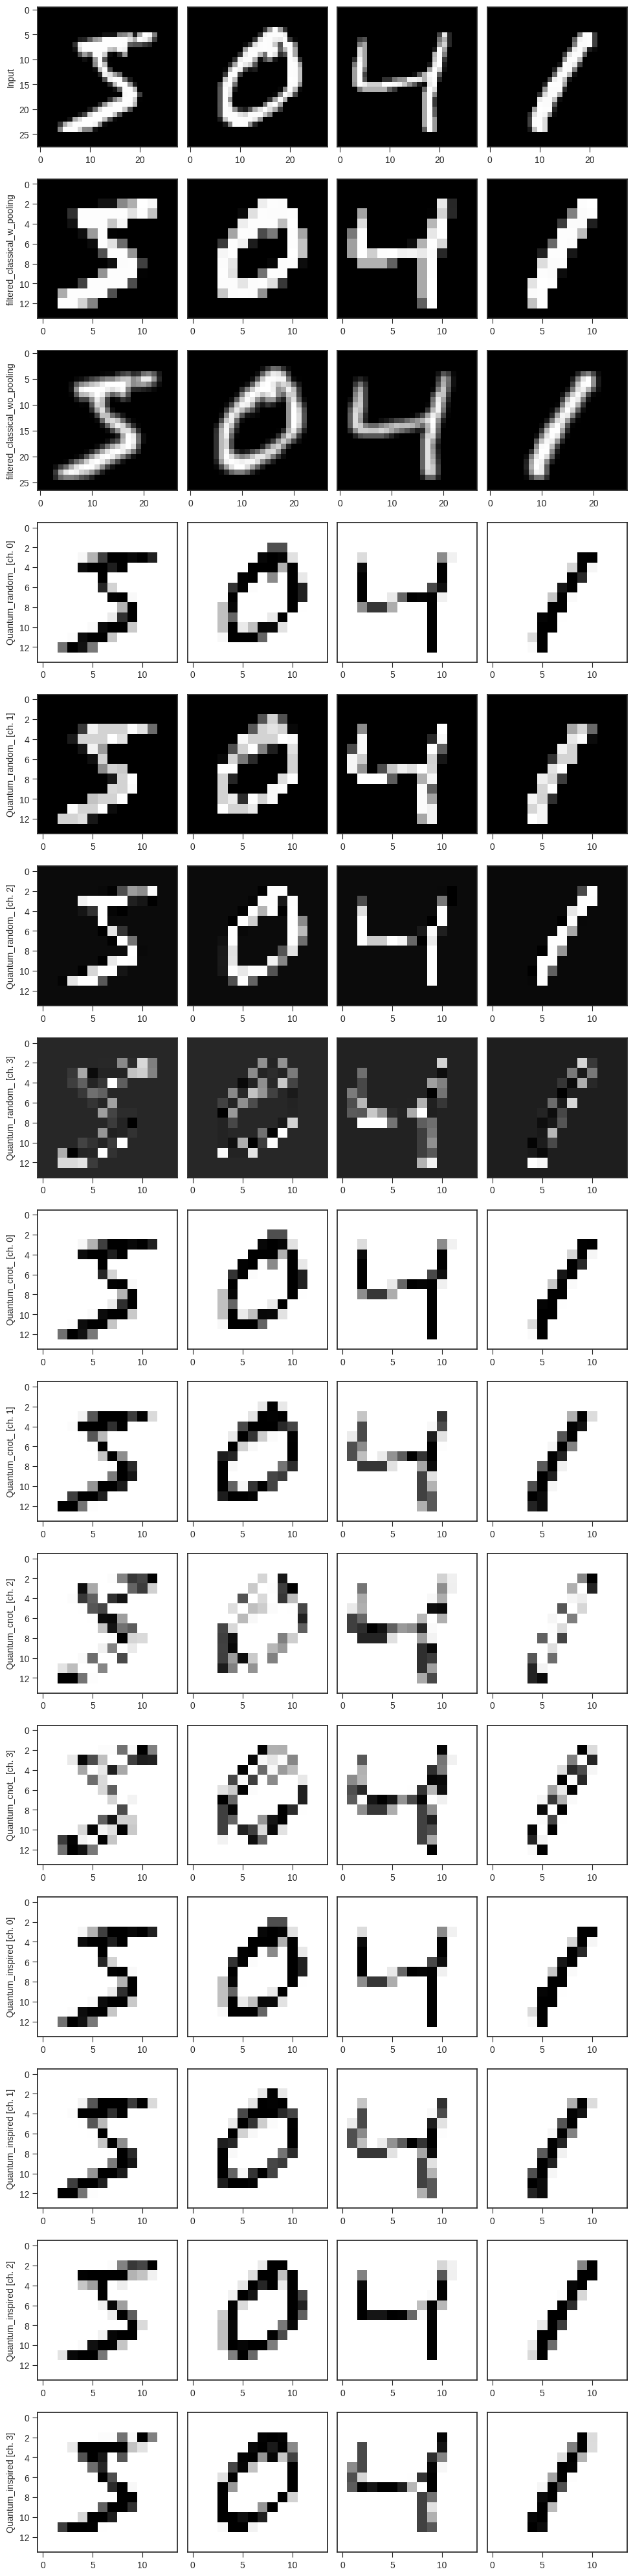

In [7]:
n_samples = 4

fig, axes = plt.subplots(1 + 2 + 12, n_samples, figsize=(10, 40))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :], cmap="gray")

for k in range(n_samples):
    axes[1, 0].set_ylabel("filtered_classical_w_pooling")
    if k != 0:
        axes[1, k].yaxis.set_visible(False)
    axes[1, k].imshow(filtered_classical_w_pooling[k, :, :], cmap="gray")

for k in range(n_samples):
    axes[2, 0].set_ylabel("filtered_classical_wo_pooling")
    if k != 0:
        axes[2, k].yaxis.set_visible(False)
    axes[2, k].imshow(filtered_classical_wo_pooling[k, :, :], cmap="gray")

    # Plot all output channels for quantum random
    for k in range(n_samples):
        for c in range(n_channels):
            axes[c + 3, 0].set_ylabel("Quantum_random_ [ch. {}]".format(c))
            if k != 0:
                axes[c + 3, k].yaxis.set_visible(False)
            axes[c + 3, k].imshow(filtered_train_images_quantum_random[k, :, :, c], cmap="gray")
            #axes[c + 7, k].imshow(filtered_train_images_quantum_cnot[k, :, :, c], cmap="gray")

    # Plot all output channels for quantum cnot find TensorRT
    for k in range(n_samples):
        for c in range(n_channels):
            axes[c + 7, 0].set_ylabel("Quantum_cnot_ [ch. {}]".format(c))
            if k != 0:
                axes[c + 7, k].yaxis.set_visible(False)
            axes[c + 7, k].imshow(filtered_train_images_quantum_cnot[k, :, :, c], cmap="gray")
    
    # Plot all output channels for quantum cnot
    for k in range(n_samples):
# with open(SAVE_PATH +'model_full_asc.json','r') as json_file:
        for c in range(n_channels):
            axes[c + 11, 0].set_ylabel("Quantum_inspired [ch. {}]".format(c))
            if k != 0:
                axes[c + 11, k].yaxis.set_visible(False)
            axes[c + 11, k].imshow(filtered_train_images_geometrical[k, :, :, c], cmap="gray")


plt.tight_layout()
plt.show()

## Load results 

In [9]:
#load the results from Json file
with open(SAVE_PATH +'model_geometrical.json','r') as json_file:
    results_geomtry = json.load(json_file)
with open(SAVE_PATH +'model_classical_w_pooling.json','r') as json_file:
    results_classical_w_pooling = json.load(json_file)
with open(SAVE_PATH +'model_quantum_random.json','r') as json_file:
    results_quantum_random = json.load(json_file)
with open(SAVE_PATH +'model_quantum_cnot.json','r') as json_file:
    results_quantum_cnot = json.load(json_file)
with open(SAVE_PATH +'model_classical_wo_pooling.json','r') as json_file:
    results_classical_wo_pooling = json.load(json_file)
with open(SAVE_PATH +'model_full_asc.json','r') as json_file:
    results_quantum_full_asc = json.load(json_file)
with open(SAVE_PATH +'model_full.json','r') as json_file:
    results_quantum_full = json.load(json_file)
with open(SAVE_PATH +'model_full_asc_last_channel.json','r') as json_file:
    results_quantum_full_asc_last_channel = json.load(json_file)
with open(SAVE_PATH +'model_full_last_channel.json','r') as json_file:
    results_quantum_full_last_channel = json.load(json_file)


## Visualisation

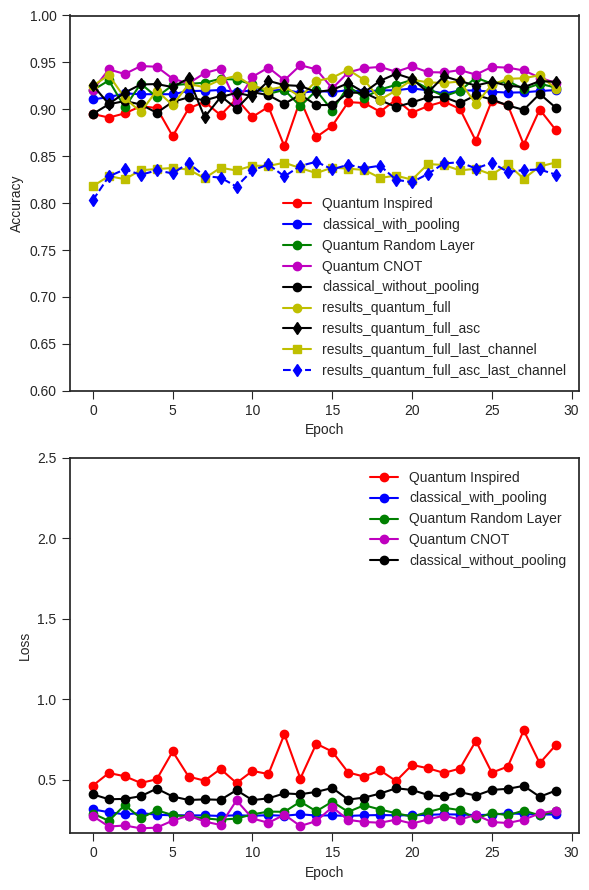

In [11]:
%matplotlib inline
plt.style.use("seaborn-v0_8-ticks")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(results_geomtry["val_accuracy"], "-or", label="Quantum Inspired")
ax1.plot(results_classical_w_pooling["val_accuracy"], "-ob", label="classical_with_pooling")
ax1.plot(results_quantum_random["val_accuracy"], "-og", label="Quantum Random Layer")
ax1.plot(results_quantum_cnot["val_accuracy"], "-om", label="Quantum CNOT")
ax1.plot(results_classical_wo_pooling["val_accuracy"], "-ok", label="classical_without_pooling")
ax1.plot(results_quantum_full["val_accuracy"], "-oy", label="results_quantum_full")
ax1.plot(results_quantum_full_asc["val_accuracy"], "-dk", label="results_quantum_full_asc")
ax1.plot(results_quantum_full_last_channel["val_accuracy"], "-sy", label="results_quantum_full_last_channel")
ax1.plot(results_quantum_full_asc_last_channel["val_accuracy"], "--db", label="results_quantum_full_asc_last_channel")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0.6, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(results_geomtry["val_loss"], "-or", label="Quantum Inspired")
ax2.plot(results_classical_w_pooling["val_loss"], "-ob", label="classical_with_pooling")
ax2.plot(results_quantum_random["val_loss"], "-og", label="Quantum Random Layer")
ax2.plot(results_quantum_cnot["val_loss"], "-om", label="Quantum CNOT")
ax2.plot(results_classical_wo_pooling["val_loss"], "-ok", label="classical_without_pooling")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

In [ ]:
np.shape(filtered_train_images)

(50, 14, 14, 4)

In [ ]:
np.shape(train_images)

(600, 28, 28, 1)

In [7]:
SAVE_PATH

'../results_2/'

In [12]:
np.shape(train_images)

(60, 14, 14)